In [1]:
#scientific libraries and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

#torch specific
import torch
import torchvision as torchv
import torch.optim as optim

#other libraries
import time
import sys
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import atlas_mpl_style as ampl

#Using newest versions of all libraries

In [2]:
# import custom functions from src folder
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from machine_learning import *
from resnet import *
from resnet import ResNet18
from imcal import *
from imcal import Hdf5Dataset
from imcal import RandomRoll

In [3]:
#variables controlled by the user. Change these to fit your specific needs.

TRAIN_N_EVENTS = 100 #Number of events to process for each class.
RES = 50 #resolution
CUT=True #Should cut be applied? Chooses different files if True.

#Data specification
LABELS = ["PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL"]
CLASSES = len(LABELS) #The number of output nodes in the net, equal to the number of classes
FOLDERS = ["sph"]

#Set data paths
if CUT:
    N_EVENTS = 10000
    TRAIN_FILENAMES = [f"{label}_res{RES}_STmin7_Nmin5_{N_EVENTS}_events.h5" for label in LABELS]
else:
    N_EVENTS = 10000
    TRAIN_FILENAMES = [f"{label}_res{RES}_{N_EVENTS}_events.h5" for label in LABELS]

TRAIN_DATAPATHS = [f"/disk/atlas3/data_MC/2dhistograms/{FOLDERS[i]}/{RES}/{TRAIN_FILENAMES[i]}" for i in range(CLASSES)]

#Setup CPU
DEVICE = torch.device("cpu")
print("Running on the CPU")

#Data processing
filters=[None]
transforms = torch.nn.Sequential(
        CircularPadding(4, 0)
    )
#For plotting
ampl.use_atlas_style()   

Running on the CPU


In [6]:
paths = [Path(path) for path in TRAIN_DATAPATHS]
data = load_datasets(paths, DEVICE, TRAIN_N_EVENTS, filters, transforms=transforms)

Loads data with transforms Sequential(
  (0): CircularPadding()
) and filters [None]
Loaded data with 100 entries of shape (100, 50, 50, 3).
Check max value: 9846.212890625.
Data has shape torch.Size([50, 50, 3])
There are 1 classes.


In [7]:
print(data[0][0].shape)

torch.Size([58, 50, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([58, 50, 3])


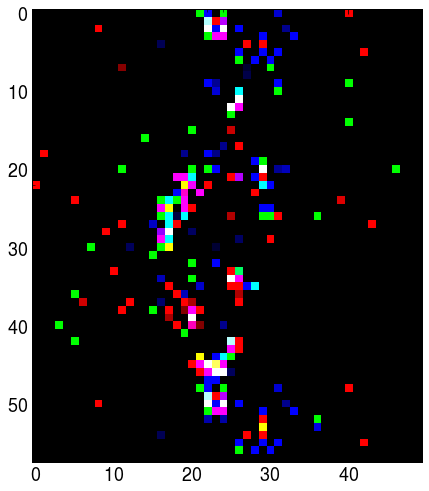

In [8]:
input = data[5][0].cpu()
print(input.shape)
plt.imshow(input)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


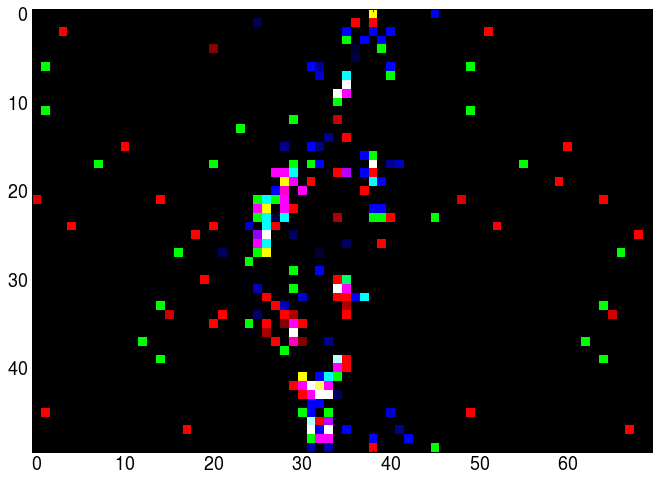

In [123]:
def circular_padding(image, pad_len:int, pad_dim:int):
    #pads image on both sides in either x or y-direction (as seen by imshow)
    y_dim = image.shape[0]
    x_dim = image.shape[1]
    channels = image.shape[-1]
    if pad_dim==0:
        new_image = torch.zeros((x_dim + 2*pad_len, y_dim, channels))
        new_image[pad_len-1:-(pad_len+1), :, :] = image
        #padding from opposite side
        new_image[0:pad_len, :, :] = image[-(pad_len+1):-1, :, :]
        new_image[-(pad_len+1):-1, :, :] = image[0:pad_len, :, :]
        return new_image

    elif pad_dim==1:
        new_image = torch.zeros((x_dim, y_dim + 2*pad_len, channels))
        new_image[:, pad_len-1:-(pad_len+1), :] = image
        #padding from opposite side
        new_image[:, 0:pad_len, :] = image[:, -(pad_len+1):-1, :]
        new_image[:, -(pad_len+1):-1, :] = image[:, 0:pad_len, :]
        return new_image

    else:
        print("pad direction should be x or y")
        return image
    
test = circular_padding(input, 10, 1)
plt.imshow(test)